In [317]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
mp.mp.dps = 20 #higher precision
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from plotDensity import *

In [318]:

#Keep having issues with check energy ranges. Currently only using seeds that worked
#Probably issue of having conflicting preruns?
batch_results_8 = []
for seed in range(100, 448):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_8_Y_8/seed_%d"%seed+"/error_class_"+error+"/intervals_5_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_0.107000/X_8_Y_8/seed_%d"%seed+"/error_class_"+error+"/intervals_3_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 8 by 8 had an issue for seed',seed)
            all_good = False
    
    if all_good:
        batch_results_8.append(res)
        
        
batch_results_10 = []
for seed in range(100, 448):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_10_Y_10/seed_%d"%seed+"/error_class_"+error+"/intervals_5_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_0.107000/X_10_Y_10/seed_%d"%seed+"/error_class_"+error+"/intervals_3_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 10 by 10 had an issue for seed',seed)
            all_good = False
    
    if all_good:
        batch_results_10.append(res)      
        
    
#Log sum exp with arbitrary precision
#Gives infinite temperature version of the free energy, for scaling
#Also useful later on
def log_sum_exp(to_sum):  
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
    res = maxval + mp.log(exp_sum)
    return res


def free_energy(E_list, log_g_list,  T):
    #Need to log sum over g(E)*exp(-E/T) without overflow issues   
    to_sum = []
    for i, log_g in enumerate(log_g_list):
        to_sum.append(log_g - E_list[i]/T)
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
    res = maxval + mp.log(exp_sum)
    return -T*res

def get_free_energies(rescaled_results,temperatures):
    free_energies = []
    for seed_results in rescaled_results:
        free_energy_classes = []
        for error_result in seed_results:    
            f_values = []
            for T in temperatures:
                f_values.append(free_energy(error_result[0], error_result[1], T)/(-T))
            free_energy_classes.append(f_values)
        free_energies.append(free_energy_classes)
    return free_energies

    
def process_results(batch_results,X,Y):
    rescaled_results = []
    for seed_results in batch_results:
                
        rescaled_seed_results = []
        for error_result in seed_results:    
                        
            walker_results = error_result
            walker_results = get_renormalized_log_g_values_as_dict_list(walker_results)
            walker_results = average_matching_keys(walker_results)
            results_x = []
            results_y = []
            for result in walker_results:
                results_y.append(np.array(list(result.values())))
                results_x.append(np.array(list(result.keys())))
                
            derivatives_wrt_e = get_derivative_wrt_e(walker_results)
            minimum_deviation_energies = find_lowest_inverse_temp_deviation(derivatives_wrt_e)
            rescale_results_for_concatenation(results_x, results_y, minimum_deviation_energies)
            
            x_max = -1 -2*X*Y
            rescaled_x = []
            rescaled_y = []
            for i in range(len(results_x)):
                for j in range(len(results_x[i])):
                    if results_x[i][j] > x_max: #avoid double counting
                        x_max = results_x[i][j]
                        rescaled_x.append(results_x[i][j])
                        rescaled_y.append(results_y[i][j])

            offset = log_sum_exp(rescaled_y)
            rescaled_y = [res + mp.log(2)*X*Y - offset for res in rescaled_y]
            rescaled_seed_results.append([rescaled_x,rescaled_y])
        rescaled_results.append(rescaled_seed_results)
    return rescaled_results
            
rescaled_results_8 = process_results(batch_results_8,8,8)
rescaled_results_10 = process_results(batch_results_10,10,10)

One or more error classes at 8 by 8 had an issue for seed 123
One or more error classes at 8 by 8 had an issue for seed 129


In [319]:
batch_results_12 = []
for seed in range(100, 400):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_12_Y_12/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        print('One or more error classes at 12 by 12 had an issue for seed',seed)
        all_good = False
    
    if all_good:
        batch_results_12.append(res)
        

        
batch_results_14 = []
for seed in range(100, 400):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_14_Y_14/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        print('One or more error classes at 14 by 14 had an issue for seed',seed)
        all_good = False
    
    if all_good:
        batch_results_14.append(res)
        
rescaled_results_12 = process_results(batch_results_12,12,12)
rescaled_results_14 = process_results(batch_results_14,14,14)

One or more error classes at 14 by 14 had an issue for seed 125
One or more error classes at 14 by 14 had an issue for seed 153
One or more error classes at 14 by 14 had an issue for seed 175
One or more error classes at 14 by 14 had an issue for seed 280
One or more error classes at 14 by 14 had an issue for seed 398


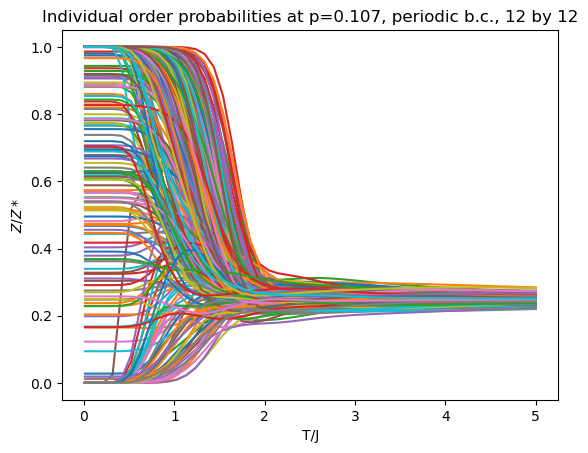

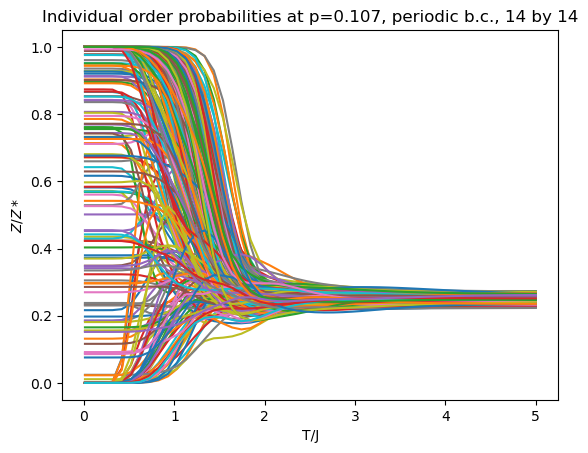

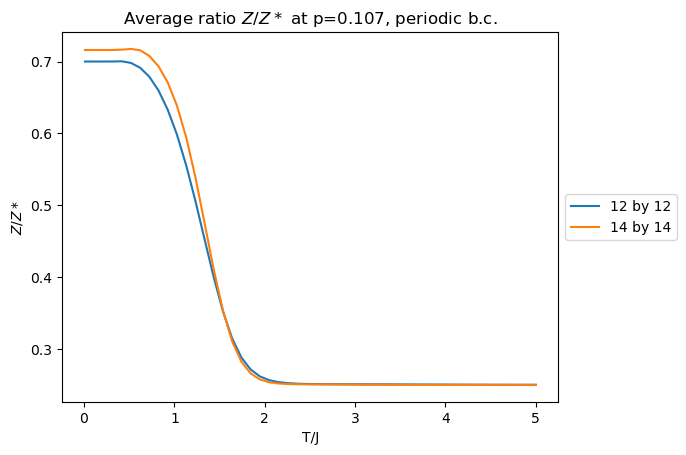

In [320]:
max_temp = 5

temperatures = np.linspace(0.01,max_temp,50)
free_energies_12 = get_free_energies(rescaled_results_12,temperatures)
free_energies_14 = get_free_energies(rescaled_results_14,temperatures)

plt.figure() 
for f_class in free_energies_12:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 12 by 12")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()

plt.figure() 
for f_class in free_energies_14:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 14 by 14")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()



plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

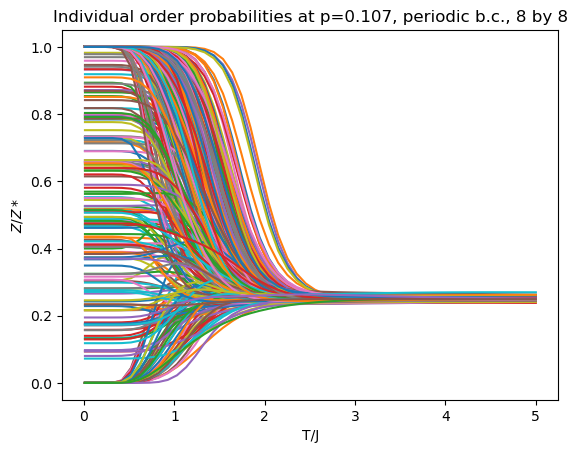

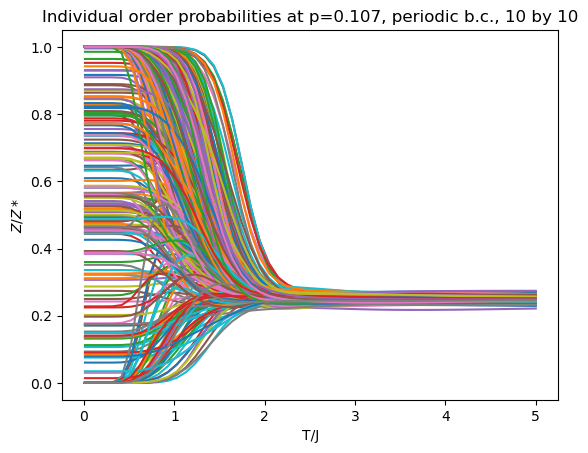

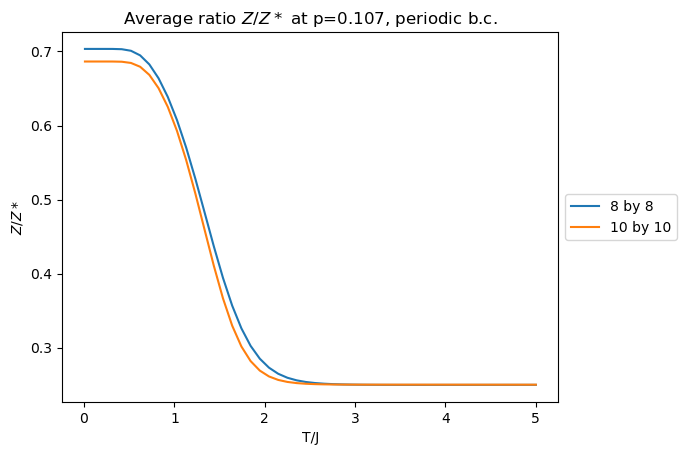

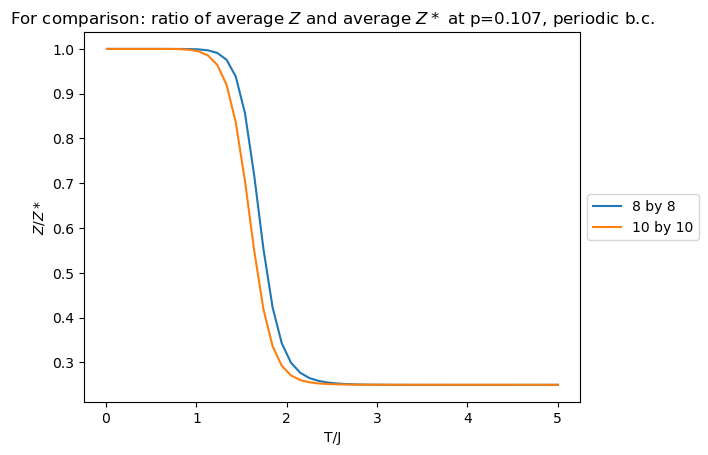

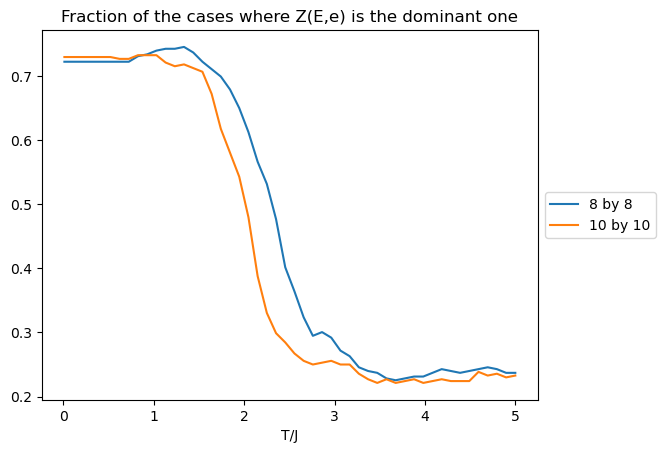

In [321]:
temperatures = np.linspace(0.01,max_temp,50)
free_energies_8 = get_free_energies(rescaled_results_8,temperatures)
free_energies_10 = get_free_energies(rescaled_results_10,temperatures)

plt.figure() 
for f_class in free_energies_8:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 8 by 8")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()

plt.figure() 
for f_class in free_energies_10:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 10 by 10")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()


####################
# We check the average of the ratio of Z

plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#We also want to check the order probability of the average, ie ratio of average Z

plt.figure()

f_class = free_energies_8[0]

average_I = [log_sum_exp([f_class[0][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_X = [log_sum_exp([f_class[1][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_Y = [log_sum_exp([f_class[2][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_Z = [log_sum_exp([f_class[3][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_all = [log_sum_exp([average_I[j],average_X[j],average_Y[j],average_Z[j]]) for j in range(len(average_I))]

plt.plot(temperatures, [mp.exp(average_I[j] - average_all[j]) for j in range(len(average_I))],label="8 by 8")


f_class = free_energies_10[0]

average_I = [log_sum_exp([f_class[0][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_X = [log_sum_exp([f_class[1][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_Y = [log_sum_exp([f_class[2][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_Z = [log_sum_exp([f_class[3][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_all = [log_sum_exp([average_I[j],average_X[j],average_Y[j],average_Z[j]]) for j in range(len(average_I))]

plt.plot(temperatures, [mp.exp(average_I[j] - average_all[j]) for j in range(len(average_I))],label="10 by 10")

plt.title(r"For comparison: ratio of average $Z$ and average $Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


############
#For comparison, we also count how often any individual ratio is off.

plt.figure()
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_8])/(len(free_energies_8))\
                        for j in range(len(f_class[0])) ] , label = "8 by 8")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_10])/(len(free_energies_10))\
                        for j in range(len(f_class[0])) ] , label = "10 by 10")
plt.title("Fraction of the cases where Z(E,e) is the dominant one")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


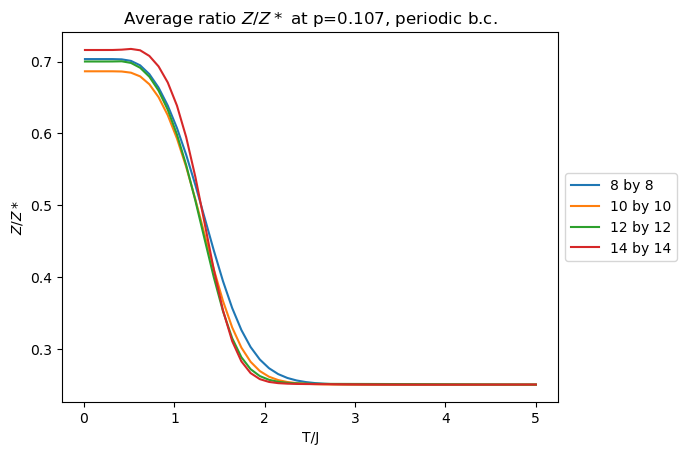

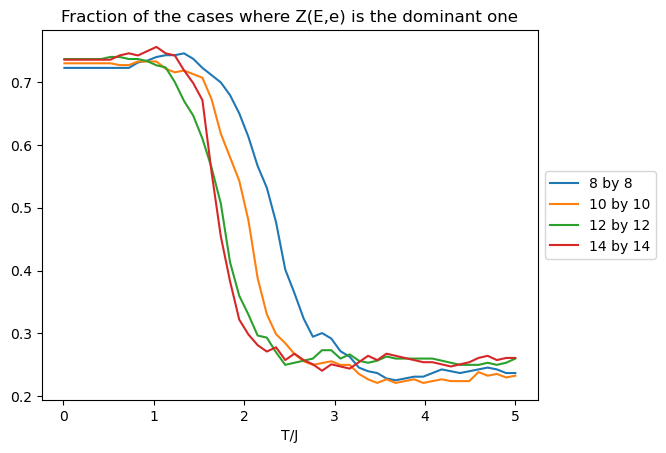

In [322]:
plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



plt.figure()
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_8])/(len(free_energies_8))\
                        for j in range(len(f_class[0])) ] , label = "8 by 8")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_10])/(len(free_energies_10))\
                        for j in range(len(f_class[0])) ] , label = "10 by 10")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_12])/(len(free_energies_12))\
                        for j in range(len(f_class[0])) ] , label = "12 by 12")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_14])/(len(free_energies_14))\
                        for j in range(len(f_class[0])) ] , label = "14 by 14")


plt.title("Fraction of the cases where Z(E,e) is the dominant one")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [323]:
#For now, take a rough value for the Nishimori temp just by eye -- for this p, it should be around 0.95
j_Nish = 0
min_so_far = 1
for j, temp in enumerate(temperatures):
    #print(j, abs(temp-0.95))
    if abs(temp-0.95)<min_so_far:
        j_Nish = j
    min_so_far = abs(temp-0.95)

print(j_Nish, abs(temperatures[j_Nish]-0.95))

9 0.02346938775510199


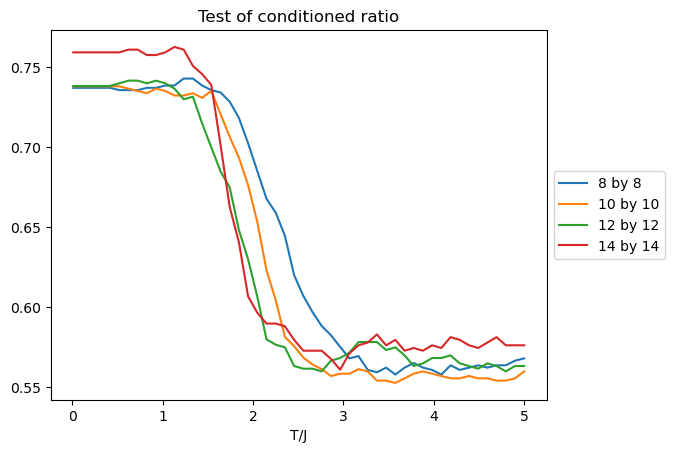

In [324]:
#Done for each f_class (meaning for each seed). Then we average later, when plotting

#In the ratios we do not use j but rather j_Nish,
#with j_Nish being whichever index gets us the Nishimori temperature
#(later, we should compute exactly at the Nishimori point to compare)

def fractions(f_class):
    res = []
    
    
    
    
    for j in range(len(f_class[0])):
        
        #If condition determines if we are in the equivalence class the dedcoder chooses
                
        if f_class[0][j]>f_class[1][j]:
            
            result = (1/(1+ mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish])))
        else:
            result = (-(mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish]))
                      /(1 + mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish])))
        res.append(result)
    return res
            


plt.figure() 
plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")




plt.title("Test of conditioned ratio")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [325]:
# Question: can we loop over *all* bond configurations for a small system to 
# check the two logical error curve methods?
# Let's say 4 by 4 torus?
print(2**32)


# Note: we expect that looking at the dominant Z probably makes sense in the ordered phase only. 
# Should compare the two curves in that regime, for lower values of p

4294967296


In [203]:
#sanity check that math is mathing, i.,e. that the Z(E,e) dominant curve should also go to 1/4
randvals = np.random.rand(1000000,4)
print(sum([randvals[i][0]>randvals[i][1] or randvals[i][0]>randvals[i][2] or randvals[i][0]>randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))
print(sum([randvals[i][0]<randvals[i][1] and randvals[i][0]<randvals[i][2] and randvals[i][0]<randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))

print(1/(1+1+1+1))


#Next, if trivial class is twice as likely as the other, what do we get?
print(sum([2*randvals[i][0]>randvals[i][1] or 2*randvals[i][0]>randvals[i][2] or 2*randvals[i][0]>randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))
print(sum([2*randvals[i][0]<randvals[i][1] and 2*randvals[i][0]<randvals[i][2] and 2*randvals[i][0]<randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))

print(2/(2+1+1+1))


print('\n')


#sanity check that math is mathing, i.,e. that the Z(E,e) dominant curve should also go to 1/4
randvals = np.random.rand(10000000,2)
print(sum([randvals[i][0]>randvals[i][1] \
           for i in range(len(randvals))])/len(randvals))
print(sum([randvals[i][0]<randvals[i][1] \
           for i in range(len(randvals))])/len(randvals))

print(1/(1+1))


#Next, if trivial class is twice as likely as the other, what do we get?
print(sum([2*randvals[i][0]>randvals[i][1]\
           for i in range(len(randvals))])/len(randvals))
print(sum([2*randvals[i][0]<randvals[i][1]\
           for i in range(len(randvals))])/len(randvals))

print(2/(2+1))

print(sum([2*randvals[i][0]/(2*randvals[i][0] + randvals[i][1])\
           for i in range(len(randvals))])/len(randvals))

print(sum([randvals[i][1]/(2*randvals[i][0] + randvals[i][1])\
           for i in range(len(randvals))])/len(randvals))


print(sum([2*randvals[i][0] for i in range(len(randvals))])/sum([2*randvals[i][0]+randvals[i][1] for i in range(len(randvals))]) )

print(sum([randvals[i][1] for i in range(len(randvals))])/sum([2*randvals[i][0]+randvals[i][1] for i in range(len(randvals))]) )

0.749863
0.250137
0.25
0.87482
0.12518
0.4


0.4997771
0.5002229
0.5
0.7499939
0.2500061
0.6666666666666666
0.6307257997192897
0.36927420028081215
0.6665877371553521
0.333412262844716


In [254]:
print(7*4*20/60)

#at 4:33: seed 128 for probability 0.
#at 5:25: seed 133, but had been stuck for a while probably.

9.333333333333334


In [316]:
for p in [0,0.02,0.04,0.06,0.08,0.1,0.12]:
    if p == 0:
        T_Nish = 1e-10 #avoid zero division
    else:
        T_Nish = 1/(mp.log((1-p)/p)/2)        
    print(T_Nish)

1e-10
0.51389834236975069304464938937018938665133916493216
0.62931596088824973365382784631385377240273830912679
0.72686692063163383541493662124620866646563046511383
0.81888444641023926992160943541946879123780400080343
0.91023922662683739361424016573610700061263605725521
1.0037992976837764127490265141214035789920569696676


In [346]:
batch_results = []
for p in [0,0.02,0.04,0.06,0.08,0.1,0.12]:
    
    print('Probability',p)
    
    batch_res_4 = []
    for seed in range(100, 200):
        res = []
        all_good = True
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                #print(filename)
                res.append(read_data_from_file(filename))
                
                if p > 0:
                    no #we don't want 20 intervals here
        except:
            try:
                for error in ["I","X","Y","Z"]:
                    filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                    res.append(read_data_from_file(filename))
                    
                    if p>0:
                        no #we also don't want 10
            except:
                try:
                    for error in ["I","X","Y","Z"]:
                        filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                        res.append(read_data_from_file(filename))
                except:
                    print('One or more error classes at 4 by 4 had an issue for seed',seed)
                    all_good = False

        if all_good:
            batch_res_4.append(res)
    
    batch_res_6 = []
    for seed in range(100, 200):
        res = []
        all_good = True
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                #print(filename)
                res.append(read_data_from_file(filename))
        except:
            try:
                for error in ["I","X","Y","Z"]:
                    filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                    res.append(read_data_from_file(filename))
            except:
                try:
                    for error in ["I","X","Y","Z"]:
                        filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                        res.append(read_data_from_file(filename))
                except:
                    print('One or more error classes at 6 by 6 had an issue for seed',seed)
                    all_good = False

        if all_good:
            batch_res_6.append(res)
            

    print('Adding to results for probability',p)
    print('Number of seeds:', len(batch_res_4), len(batch_res_6))
    rescaled_res_4 = process_results(batch_res_4,4,4)
    rescaled_res_6 = process_results(batch_res_6,6,6)
    batch_results.append([rescaled_res_4,rescaled_res_6])

Probability 0
One or more error classes at 6 by 6 had an issue for seed 133
Adding to results for probability 0
Number of seeds: 100 99
Probability 0.02
Adding to results for probability 0.02
Number of seeds: 100 100
Probability 0.04
One or more error classes at 4 by 4 had an issue for seed 172
One or more error classes at 4 by 4 had an issue for seed 173
One or more error classes at 4 by 4 had an issue for seed 174
One or more error classes at 4 by 4 had an issue for seed 175
One or more error classes at 4 by 4 had an issue for seed 176
One or more error classes at 4 by 4 had an issue for seed 177
One or more error classes at 4 by 4 had an issue for seed 178
One or more error classes at 4 by 4 had an issue for seed 179
One or more error classes at 4 by 4 had an issue for seed 180
One or more error classes at 4 by 4 had an issue for seed 181
One or more error classes at 4 by 4 had an issue for seed 182
One or more error classes at 4 by 4 had an issue for seed 183
One or more error clas

Probability 0.08
One or more error classes at 4 by 4 had an issue for seed 143
One or more error classes at 4 by 4 had an issue for seed 144
One or more error classes at 4 by 4 had an issue for seed 145
One or more error classes at 4 by 4 had an issue for seed 146
One or more error classes at 4 by 4 had an issue for seed 147
One or more error classes at 4 by 4 had an issue for seed 148
One or more error classes at 4 by 4 had an issue for seed 149
One or more error classes at 4 by 4 had an issue for seed 150
One or more error classes at 4 by 4 had an issue for seed 151
One or more error classes at 4 by 4 had an issue for seed 152
One or more error classes at 4 by 4 had an issue for seed 153
One or more error classes at 4 by 4 had an issue for seed 154
One or more error classes at 4 by 4 had an issue for seed 155
One or more error classes at 4 by 4 had an issue for seed 156
One or more error classes at 4 by 4 had an issue for seed 157
One or more error classes at 4 by 4 had an issue for 

One or more error classes at 6 by 6 had an issue for seed 143
One or more error classes at 6 by 6 had an issue for seed 144
One or more error classes at 6 by 6 had an issue for seed 145
One or more error classes at 6 by 6 had an issue for seed 146
One or more error classes at 6 by 6 had an issue for seed 147
One or more error classes at 6 by 6 had an issue for seed 148
One or more error classes at 6 by 6 had an issue for seed 149
One or more error classes at 6 by 6 had an issue for seed 150
One or more error classes at 6 by 6 had an issue for seed 151
One or more error classes at 6 by 6 had an issue for seed 152
One or more error classes at 6 by 6 had an issue for seed 153
One or more error classes at 6 by 6 had an issue for seed 154
One or more error classes at 6 by 6 had an issue for seed 155
One or more error classes at 6 by 6 had an issue for seed 156
One or more error classes at 6 by 6 had an issue for seed 157
One or more error classes at 6 by 6 had an issue for seed 158
One or m

In [347]:
free_energies_batch = []

for i, p in enumerate([0,0.02,0.04,0.06,0.08,0.1,0.12]):
    
    print('Probability',p)
    
    if p == 0:
        T_Nish = 0
    else:
        T_Nish = 1/(mp.log((1-p)/p)/2)  
        
    temperatures = [1e-10,T_Nish]
    
    if len(batch_results)>=i+1 and p>0:
        
        #will need a separate function for the p=0 case.
            
        free_energies_4 = get_free_energies(batch_results[i][0],temperatures)
        free_energies_6 = get_free_energies(batch_results[i][1],temperatures)
        free_energies_batch.append([free_energies_4,free_energies_6])
        

Probability 0
Probability 0.02
Probability 0.04
Probability 0.06
Probability 0.08
Probability 0.1
Probability 0.12


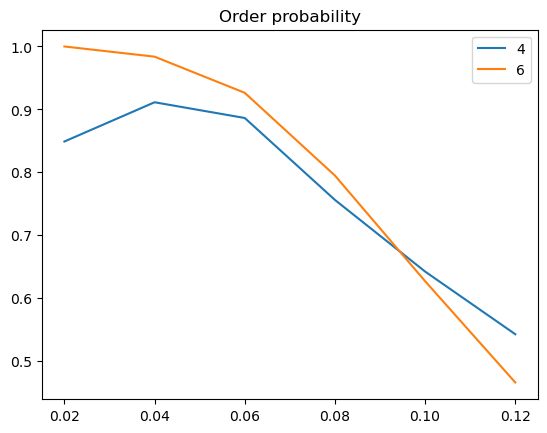

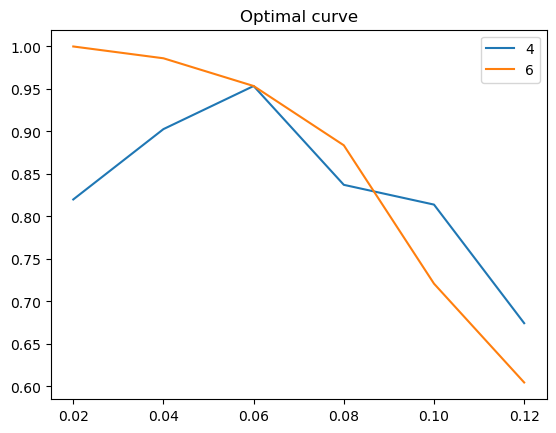

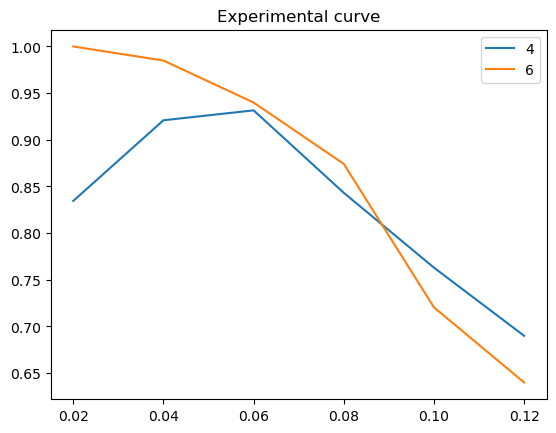

In [348]:
def experimental_fraction(f_class, j):
    res = []
    
    #If condition determines if we are in the equivalence class the dedcoder chooses

    if f_class[0][j]>f_class[1][j]:

        result = (1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                      +mp.exp(f_class[2][j] - f_class[0][j])\
                      +mp.exp(f_class[3][j] - f_class[0][j])))
    else:
        result = (-(mp.exp(f_class[1][j] - f_class[0][j])\
                      +mp.exp(f_class[2][j] - f_class[0][j])\
                      +mp.exp(f_class[3][j] - f_class[0][j]))
                  /(1 + mp.exp(f_class[1][j] - f_class[0][j])\
                      +mp.exp(f_class[2][j] - f_class[0][j])\
                      +mp.exp(f_class[3][j] - f_class[0][j])))
    return result



optimal_curve = []
mwpm_curve = []

order_probability = []

experimental_curve = []


probabilities = [0.02,0.04,0.06,0.08,0.1,0.12]

for i, p in enumerate(probabilities):
    free_energies_4 = free_energies_batch[i][0]
    free_energies_6 = free_energies_batch[i][1]
    
    j = 1
    res1 = np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_4 ])/len(free_energies_4) 

    res2 = np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
    
    order_probability.append([res1,res2])
    
    
    j = 1
    res1 =  1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    optimal_curve.append([res1,res2])
    
    
    
    res1 = 0.5 + 0.5 * np.sum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = 0.5 + 0.5 * np.sum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve.append([res1,res2])

    
    
plt.figure
plt.plot(probabilities, order_probability,label=["4","6"])
plt.title("Order probability")
plt.legend()
plt.show()
             
plt.figure
plt.plot(probabilities, optimal_curve,label=["4","6"])
plt.title("Optimal curve")
plt.legend()
plt.show()

plt.figure
plt.plot(probabilities, experimental_curve,label=["4","6"])
plt.title("Experimental curve")
plt.legend()
plt.show()